In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [165]:
from linearmodels import PooledOLS
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

from scipy import stats

In [166]:
#read the csv file and parse the date column
data = pd.read_csv(r'Walmart_Store_sales.csv')


In [167]:
#data types of the columns
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [168]:
import pandas as pd
from datetime import datetime

# Assuming your data is in a DataFrame named 'data'
def convert_date(date_str):
    try:
        return datetime.strptime(date_str, '%m/%d/%Y')
    except ValueError:
        return datetime.strptime(date_str, '%d-%m-%Y')

data['Date'] = data['Date'].apply(convert_date)


In [169]:
#data types of the columns
data.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [170]:
#checking for missing values
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [171]:
#splitting the date into day, month and year
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [172]:
#which store has maximum and minimum sales
store_sales = data.groupby('Store')['Weekly_Sales'].sum()
print('Store with maximum sales:', store_sales.idxmax())
print('Store with minimum sales:', store_sales.idxmin())

Store with maximum sales: 20
Store with minimum sales: 33


In [173]:
#print the values of the store with maximum and minimum sales
print('Store with maximum sales:', store_sales.max())
print('Store with minimum sales:', store_sales.min())


Store with maximum sales: 301397792.46
Store with minimum sales: 37160221.96


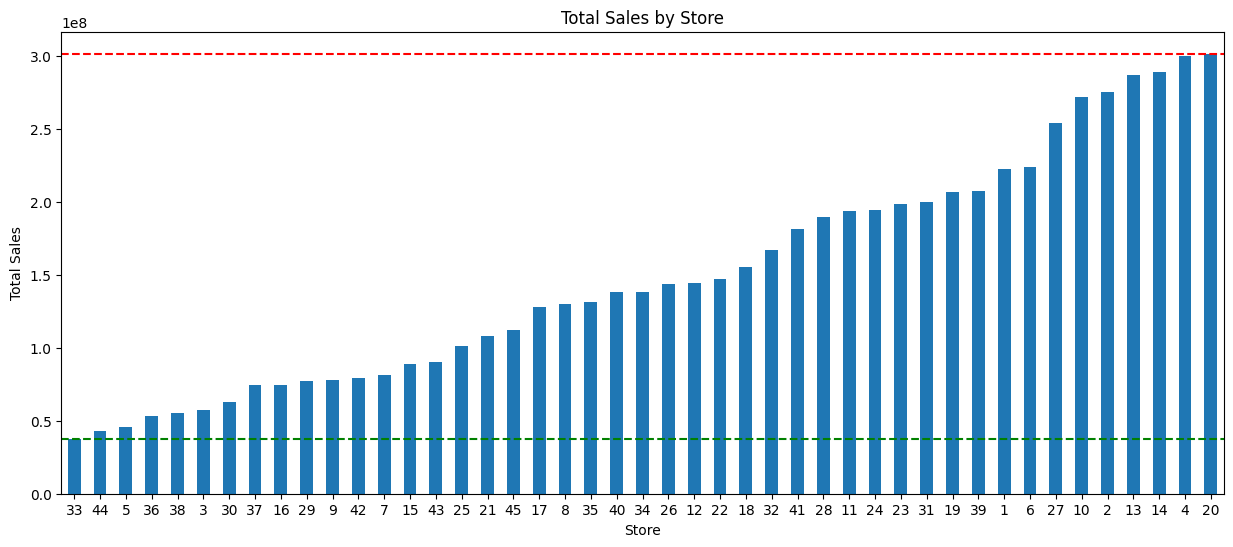

In [174]:
#creating a bar chart in ascending order of sales and highlighting the store with maximum and minimum sales
store_sales.sort_values().plot(kind='bar', figsize=(15, 6))
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store')
plt.xticks(rotation=0)
plt.axhline(store_sales.max(), color='r', linestyle='--')
plt.axhline(store_sales.min(), color='g', linestyle='--')
plt.show()


In [175]:
#Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation?
store_std = data.groupby('Store')['Weekly_Sales'].std()
store_std.idxmax(), round(store_std.max(), 2)



(14, 317569.95)

In [176]:
#The store has maximum standard deviation is 14 with 317570 $

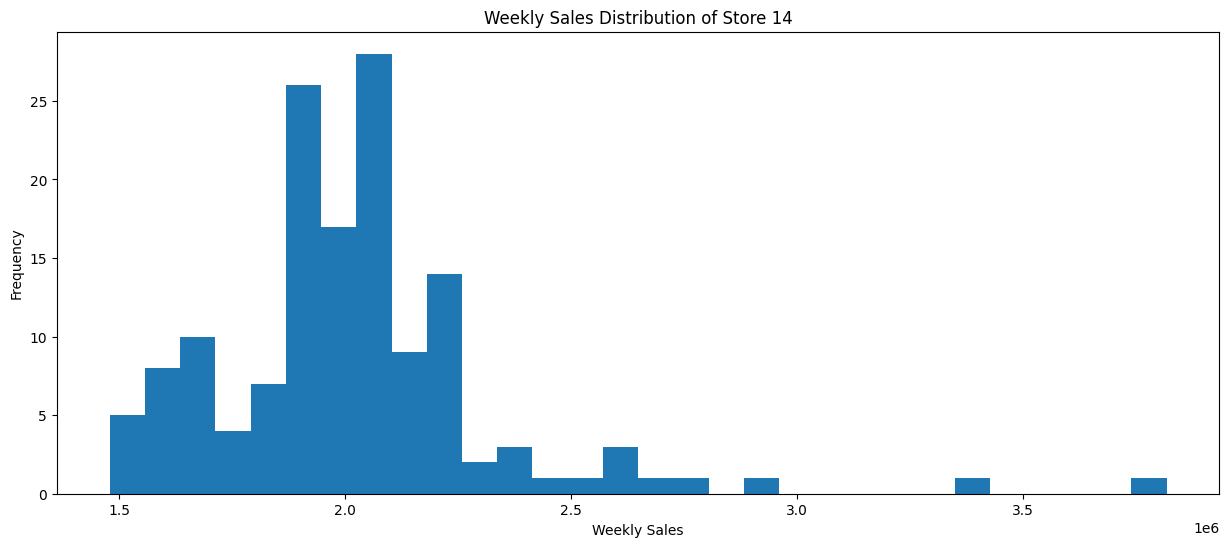

In [177]:
#distribution of the store with maximum standard deviation
store_data = data[data['Store'] == store_std.idxmax()]
store_data['Weekly_Sales'].plot(kind='hist', bins=30, figsize=(15, 6))
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales Distribution of Store 14')
plt.show()

In [178]:
#coefficient of mean to standard deviation to all stores
store_mean = data.groupby('Store')['Weekly_Sales'].mean()
mean_std_ratio = store_std / store_mean
mean_std_ratio


Store
1     0.100292
2     0.123424
3     0.115021
4     0.127083
5     0.118668
6     0.135823
7     0.197305
8     0.116953
9     0.126895
10    0.159133
11    0.122262
12    0.137925
13    0.132514
14    0.157137
15    0.193384
16    0.165181
17    0.125521
18    0.162845
19    0.132680
20    0.130903
21    0.170292
22    0.156783
23    0.179721
24    0.123637
25    0.159860
26    0.110111
27    0.135155
28    0.137330
29    0.183742
30    0.052008
31    0.090161
32    0.118310
33    0.092868
34    0.108225
35    0.229681
36    0.162579
37    0.042084
38    0.110875
39    0.149908
40    0.123430
41    0.148177
42    0.090335
43    0.064104
44    0.081793
45    0.165613
Name: Weekly_Sales, dtype: float64

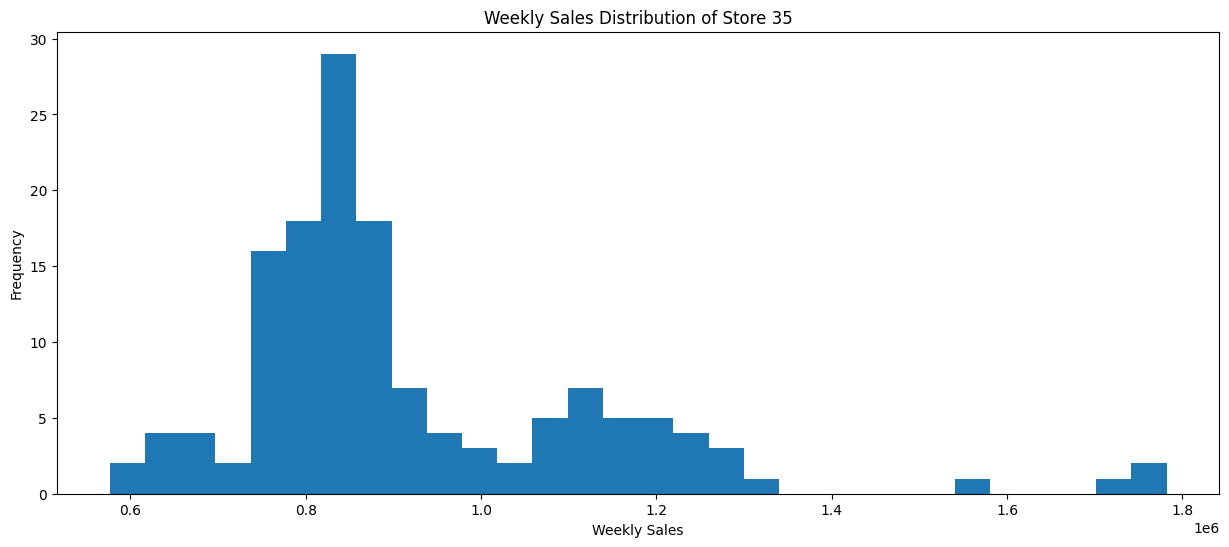

In [179]:
#distribution of the store with mean to standard deviation ratio
store_data = data[data['Store'] == mean_std_ratio.idxmax()]
store_data['Weekly_Sales'].plot(kind='hist', bins=30, figsize=(15, 6))
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales Distribution of Store 35')
plt.show()


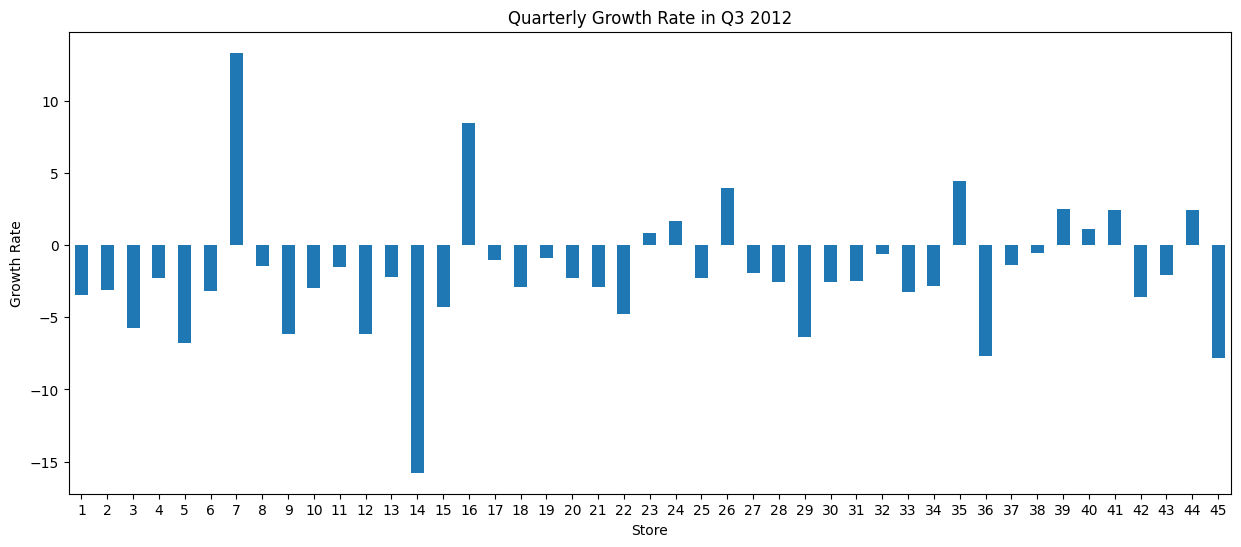

In [180]:
#which store has good quarterly growth rate in Q3’2012 among all stores?
# Calculate the total sales for each store in Q3 2012
q3_2012 = data[(data['Date'] >= '2012-07-01') & (data['Date'] <= '2012-09-30')]
q3_2012_sales = q3_2012.groupby('Store')['Weekly_Sales'].sum()

# Calculate the total sales for each store in Q2 2012
q2_2012 = data[(data['Date'] >= '2012-04-01') & (data['Date'] <= '2012-06-30')]
q2_2012_sales = q2_2012.groupby('Store')['Weekly_Sales'].sum()

# Calculate the growth rate for each store
growth_rate = ((q3_2012_sales - q2_2012_sales) / q2_2012_sales) * 100

#visualizing the growth rate
growth_rate.plot(kind='bar', figsize=(15, 6))
plt.xlabel('Store')
plt.ylabel('Growth Rate')
plt.title('Quarterly Growth Rate in Q3 2012')
plt.xticks(rotation=0)
plt.show()



In [181]:
#print the store with good quarterly growth rate in Q3’2012 among all stores
print('Store with good quarterly growth rate in Q3 2012:', growth_rate.idxmax())
print('Growth Rate:', growth_rate.max())

Store with good quarterly growth rate in Q3 2012: 7
Growth Rate: 13.330776030738022


In [182]:
#4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together.

In [183]:
#finding the mean sales of non holiday and holiday 
data.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [184]:
# Marking the holiday dates 
data['Date'] = pd.to_datetime(data['Date'])

Christmas1 = pd.Timestamp(2010,12,31)
Christmas2 = pd.Timestamp(2011,12,30)
Christmas3 = pd.Timestamp(2012,12,28)
Christmas4 = pd.Timestamp(2013,12,27)

Thanksgiving1=pd.Timestamp(2010,11,26)
Thanksgiving2=pd.Timestamp(2011,11,25)
Thanksgiving3=pd.Timestamp(2012,11,23)
Thanksgiving4=pd.Timestamp(2013,11,29)

LabourDay1=pd.Timestamp(2010,9,10)
LabourDay2=pd.Timestamp(2011,9,9)
LabourDay3=pd.Timestamp(2012,9,7)
LabourDay4=pd.Timestamp(2013,9,6)

SuperBowl1=pd.Timestamp(2010,2,12)
SuperBowl2=pd.Timestamp(2011,2,11)
SuperBowl3=pd.Timestamp(2012,2,10)
SuperBowl4=pd.Timestamp(2013,2,8)

#Calculating the mean sales during the holidays
Christmas_mean_sales=data[(data['Date'] == Christmas1) | (data['Date'] == Christmas2) | (data['Date'] == Christmas3) | (data['Date'] == Christmas4)]
Thanksgiving_mean_sales=data[(data['Date'] == Thanksgiving1) | (data['Date'] == Thanksgiving2) | (data['Date'] == Thanksgiving3) | (data['Date'] == Thanksgiving4)]
LabourDay_mean_sales=data[(data['Date'] == LabourDay1) | (data['Date'] == LabourDay2) | (data['Date'] == LabourDay3) | (data['Date'] == LabourDay4)]
SuperBowl_mean_sales=data[(data['Date'] == SuperBowl1) | (data['Date'] == SuperBowl2) | (data['Date'] == SuperBowl3) | (data['Date'] == SuperBowl4)]
Christmas_mean_sales

list_of_mean_sales = {'Christmas_mean_sales' : round(Christmas_mean_sales['Weekly_Sales'].mean(),2),
'Thanksgiving_mean_sales': round(Thanksgiving_mean_sales['Weekly_Sales'].mean(),2),
'LabourDay_mean_sales' : round(LabourDay_mean_sales['Weekly_Sales'].mean(),2),
'SuperBowl_mean_sales':round(SuperBowl_mean_sales['Weekly_Sales'].mean(),2),
'Non holiday weekly sales' : round(data[data['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean(),2)}
list_of_mean_sales

{'Christmas_mean_sales': 960833.11,
 'Thanksgiving_mean_sales': 1471273.43,
 'LabourDay_mean_sales': 1042427.29,
 'SuperBowl_mean_sales': 1079127.99,
 'Non holiday weekly sales': 1041256.38}

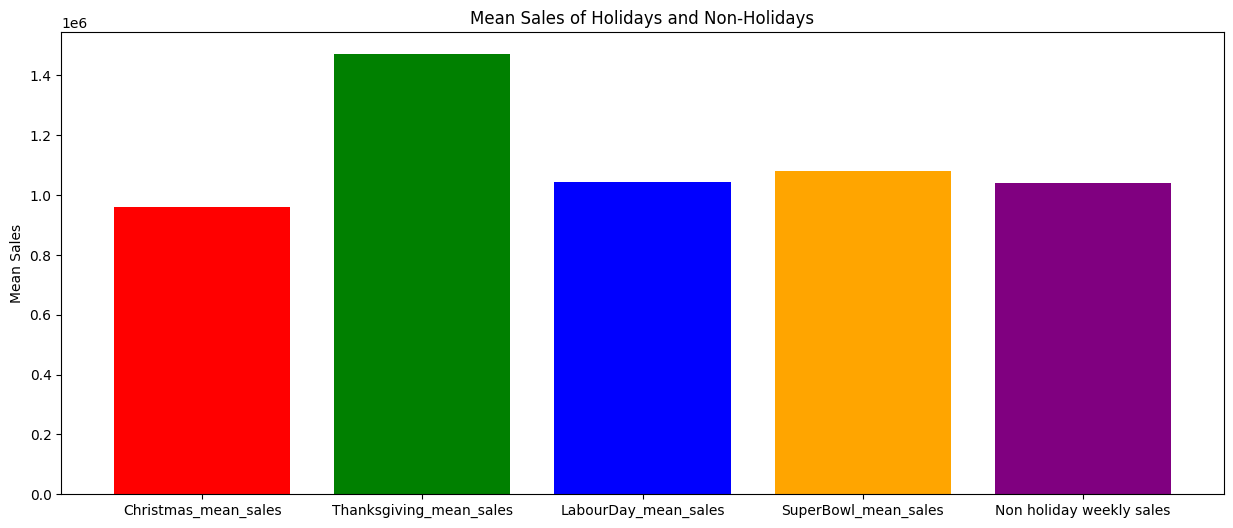

In [185]:
#visualizing the sales of christmas, thanksgiving, labour day and superbowl with values
plt.figure(figsize=(15, 6))
plt.bar(list_of_mean_sales.keys(), list_of_mean_sales.values(), color=['red', 'green', 'blue', 'orange', 'purple'])
plt.ylabel('Mean Sales')
plt.title('Mean Sales of Holidays and Non-Holidays')
plt.show()




In [186]:
#"Thanksgiving Day" has much high sale than mean sales in Non-Holiday season

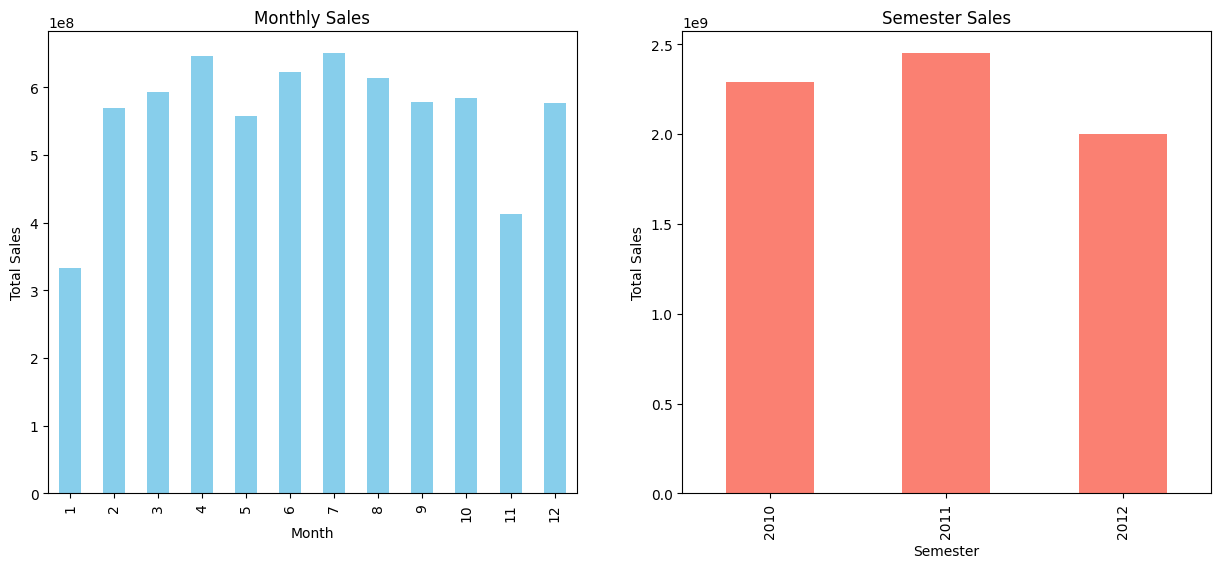

In [187]:
#Provide a total monthly and yearly view of sales in units and give insights
# Monthly sales
monthly_sales = data.groupby('month')['Weekly_Sales'].sum()

# Semester sales
semester_sales = data.groupby('year')['Weekly_Sales'].sum()

# Visualizing the monthly and semester sales
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
monthly_sales.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Total Sales')
ax[0].set_title('Monthly Sales')

semester_sales.plot(kind='bar', ax=ax[1], color='salmon')
ax[1].set_xlabel('Semester')
ax[1].set_ylabel('Total Sales')
ax[1].set_title('Semester Sales')
plt.show()


In [188]:
#print the highest monthly and yearly sales
print('Month with maximum sales:', monthly_sales.idxmax())
print('Sales:', monthly_sales.max())

print('Year with maximum sales:', semester_sales.idxmax())
print('Sales:', semester_sales.max())


Month with maximum sales: 7
Sales: 650000977.25
Year with maximum sales: 2011
Sales: 2448200007.35


C:\Users\Asus\AppData\Local\Temp\ipykernel_13052\1596449386.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = data.groupby(pd.Grouper(key='Date', freq='1M')).sum() # groupby each 1 month


Text(0, 0.5, 'Weekly_Sales')

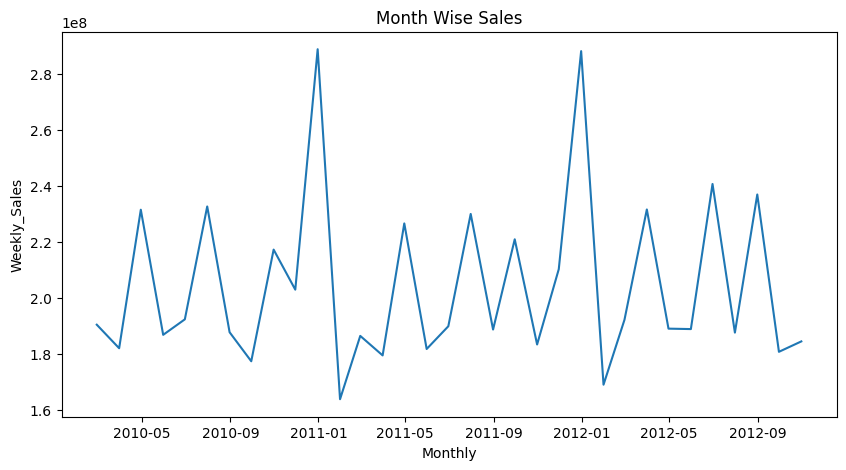

In [189]:
#Individual Monthly sales 
monthly = data.groupby(pd.Grouper(key='Date', freq='1M')).sum() # groupby each 1 month
monthly=monthly.reset_index()
fig, ax = plt.subplots(figsize=(10,5))
X = monthly['Date']
Y = monthly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Month Wise Sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly_Sales')


In [190]:
# Analysis- highest sum of sales is recorded in between jan-2011 to march-2011.

In [191]:
#correlation matrix


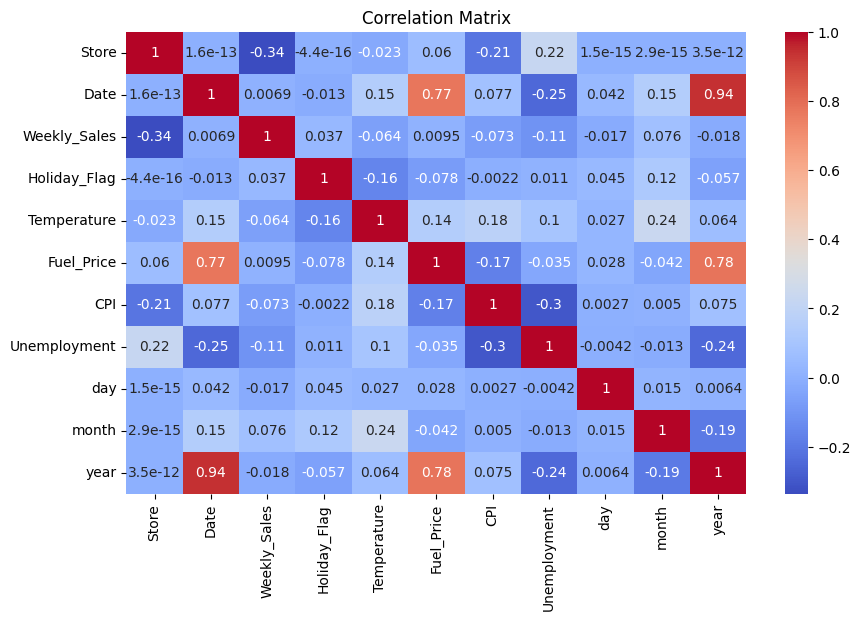

In [192]:
#plotting the correlation matrix
plt.figure(figsize=(10, 6))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [193]:
#time series analysis using ARIMA


In [194]:
#create a new dataframe with only the date and weekly sales columns for store 20 as it has maximum sales
store20 = data[data['Store'] == 20]
store20 = store20[['Date', 'Weekly_Sales']]
store20 = store20.set_index('Date')
store20

,Weekly_Sales
Date,
2010-02-05,2401395.47
2010-02-12,2109107.90
2010-02-19,2161549.76
2010-02-26,1898193.95
2010-03-05,2119213.72
...,...
2012-09-28,2008350.58
2012-10-05,2246411.89
2012-10-12,2162951.36


In [195]:
#resampling the data on weekly basis
#store20_weekly = store20.resample('W').sum()
#store20_weekly

<Axes: xlabel='Date'>

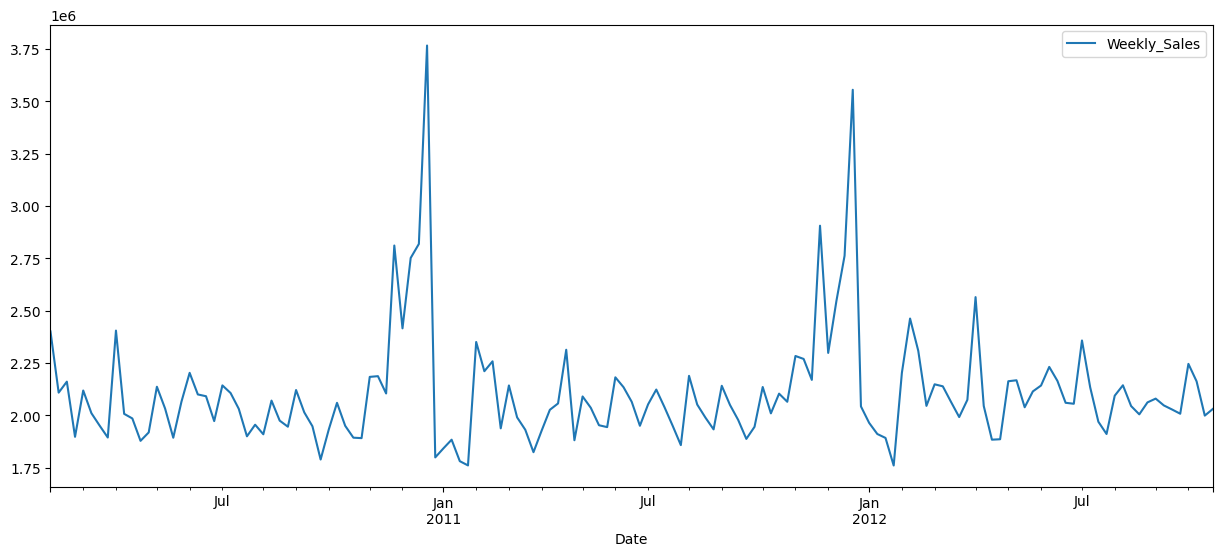

In [196]:
#plotting the weekly sales
store20.plot(figsize=(15, 6))

In [197]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [198]:
test_result=adfuller(store20['Weekly_Sales'])

In [199]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Weekly_Sales):
    result=adfuller(Weekly_Sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [200]:
adfuller_test(store20['Weekly_Sales'])

ADF Test Statistic : -5.3937386928548285
p-value : 3.4912952838128635e-06
#Lags Used : 4
Number of Observations Used : 138
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [201]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [202]:
import statsmodels.api as sm

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


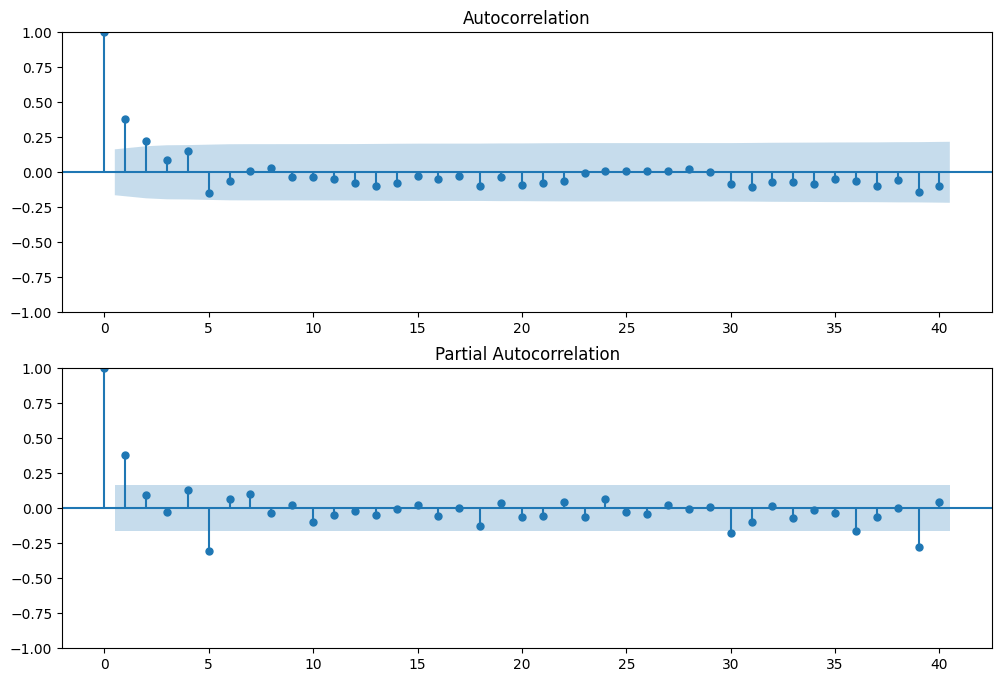

In [203]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(store20['Weekly_Sales'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(store20['Weekly_Sales'],lags=40,ax=ax2)


In [204]:
# For non-seasonal data
#p=1, d=0, q=2
from statsmodels.tsa.arima.model import ARIMA

In [205]:
model=ARIMA(store20['Weekly_Sales'],order=(1,1,2))

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [206]:
model_fit=model.fit()

model_fit.summary()

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1981.546
Date:                Wed, 08 May 2024   AIC                           3971.093
Time:                        15:21:52   BIC                           3982.916
Sample:                    02-05-2010   HQIC                          3975.897
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9389      0.198     -4.735      0.000      -1.327      -0.550
ma.L1          0.4728      0.207      2.279      0.023       0.066       0.879
ma.L2         -0.4069      0.126     -3.236      0.001      -0.653      -0.160
sigma2      7.475e+10   6.13e-12   1.22e+22      0.000    7.48e+10    7.48e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               376.67
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -0.65
Prob(H) (two-sided):                  0.34   Kurtosis:                        10.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.86e+37. Standard errors may be unstable.
"""

<Axes: xlabel='Date'>

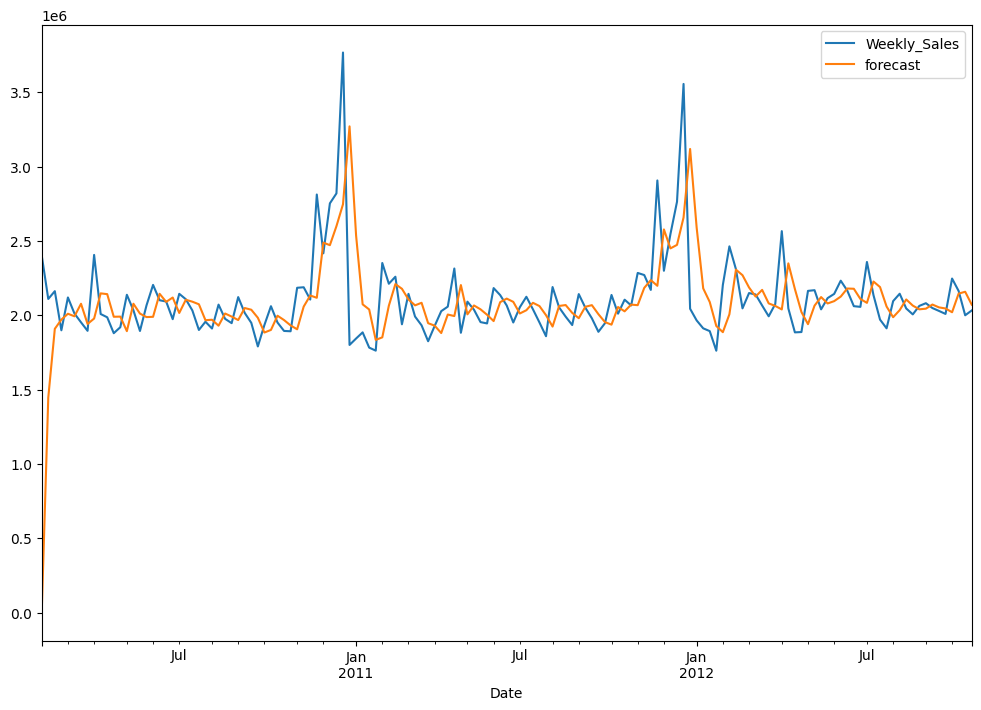

In [207]:
store20['forecast']=model_fit.predict()
store20[['Weekly_Sales','forecast']].plot(figsize=(12,8))

In [208]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    # Avoid division by zero by adding a small epsilon
    epsilon = 1e-10
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Example data (replace with your actual and predicted values)
y_true = store20['Weekly_Sales']
y_pred = store20['forecast']

# Calculate MAPE
mape = mean_absolute_percentage_error(y_true, y_pred)

print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

Mean Absolute Percentage Error (MAPE): 8.52%


In [209]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


In [210]:
pivot_table = pd.pivot_table(data, values = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], 
                             index = 'Date', aggfunc = {'Weekly_Sales': np.sum, 'Temperature': np.mean, 'Fuel_Price': np.mean,
                                                        'CPI': np.mean, 'Unemployment': np.mean}).reset_index()
pivot_table['Month'] = pivot_table['Date'].dt.month
pivot_table['Year'] = pivot_table['Date'].dt.year
pivot_table.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_13052\1309465243.py:1: FutureWarning: The provided callable <function sum at 0x00000264C0ED8700> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = pd.pivot_table(data, values = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],
C:\Users\Asus\AppData\Local\Temp\ipykernel_13052\1309465243.py:1: FutureWarning: The provided callable <function mean at 0x00000264C0EDBB80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = pd.pivot_table(data, values = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],


,Date,CPI,Fuel_Price,Temperature,Unemployment,Weekly_Sales,Month,Year
0,2010-02-05,167.730885,2.717844,34.037333,8.619311,49750740.50,2,2010
1,2010-02-12,167.825608,2.694022,34.151333,8.619311,48336677.63,2,2010
2,2010-02-19,167.871686,2.672067,37.719778,8.619311,48276993.78,2,2010
3,2010-02-26,167.909657,2.683933,39.243556,8.619311,43968571.13,2,2010
4,2010-03-05,167.947628,2.731200,42.917333,8.619311,46871470.30,3,2010


In [211]:
growth_df = data[['Date', 'Weekly_Sales']].resample('M', on = 'Date').sum().reset_index()
growth_df['Rolling_Month'] = np.roll(growth_df['Weekly_Sales'], 1)
growth_df['Growth_MoM'] = round((growth_df['Weekly_Sales'] - growth_df['Rolling_Month']) / growth_df['Rolling_Month'] * 100, 2)
grotwh_df = growth_df.shift(-1)
growth_df['Year'] = growth_df['Date'].dt.year
growth_df['Month'] = growth_df['Date'].dt.month

super_bowl = ['2010-02-28', '2011-02-28', '2012-02-28']
labour_day = ['2010-09-30', '2011-09-30', '2012-09-30']
thanksgiving = ['2010-11-30', '2011-11-30', '2012-11-30']
christmas = ['2010-12-31', '2011-12-31', '2012-12-31']

g2010 = growth_df[growth_df['Year'] == 2010][['Month', 'Growth_MoM']].max()
g2011 = growth_df[growth_df['Year'] == 2011][['Month', 'Growth_MoM']].max()
g2012 = growth_df[growth_df['Year'] == 2012][['Month', 'Growth_MoM']].max()

C:\Users\Asus\AppData\Local\Temp\ipykernel_13052\1109329516.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  growth_df = data[['Date', 'Weekly_Sales']].resample('M', on = 'Date').sum().reset_index()


Text(1.3, 0.1, '2012')

findfont: Font family 'sanserif' not found.
findfont: Font family 'sanserif' not found.
findfont: Font family 'sanserif' not found.
findfont: Font family 'sanserif' not found.
findfont: Font family 'sanserif' not found.
findfont: Font family 'sanserif' not found.


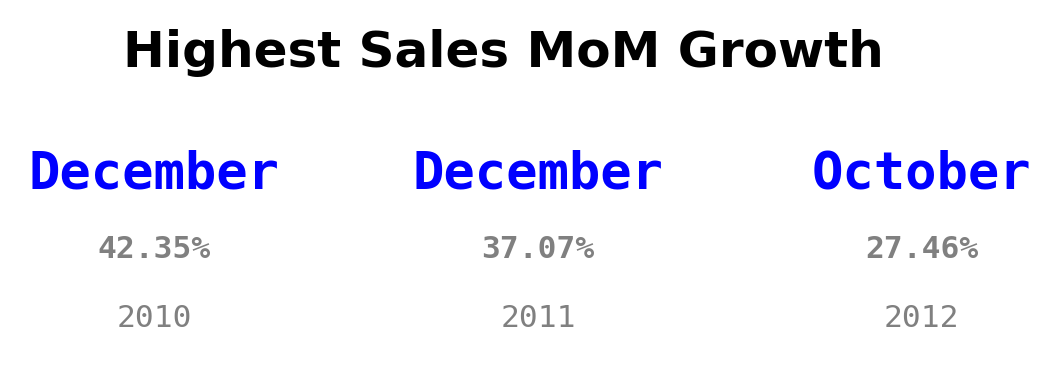

In [212]:
fig, ax = plt.subplots(1, 1, figsize = (6, 3), dpi = 150)

for s in ['top','right','left','bottom']:
    ax.spines[s].set_visible(False)
    
ax.set_yticklabels('')
ax.set_xticklabels('')
ax.tick_params(axis='both',length=0)

ax.text(0.7, 0.85, "Highest Sales MoM Growth" , color = 'black', fontsize = 24, fontweight = 'bold', 
         fontfamily = 'sanserif', ha = 'center')
ax.text(0.2, 0.5, "December", color = 'blue', fontsize = 25, fontweight = 'bold', fontfamily = 'monospace', ha = 'center')
ax.text(0.2, 0.3, "42.35%", color = 'gray', fontsize = 15, fontfamily = 'monospace',ha = 'center', fontweight = 'bold')
ax.text(0.2, 0.1, "2010", color = 'gray',fontsize = 15, fontfamily = 'monospace', ha = 'center')
ax.text(0.75, 0.5, "December", color = 'blue', fontsize = 25, fontweight = 'bold', fontfamily = 'monospace', ha = 'center')
ax.text(0.75, 0.3, "37.07%", color = 'gray', fontsize = 15, fontweight = 'bold', fontfamily = 'monospace', ha = 'center')
ax.text(0.75, 0.1, "2011", color = 'gray', fontsize = 15, fontfamily = 'monospace', ha = 'center')
ax.text(1.3, 0.5, "October", color = 'blue', fontsize = 25, fontweight = 'bold', fontfamily = 'monospace', ha = 'center')
ax.text(1.3, 0.3, "27.46%", color = 'gray', fontsize = 15, fontfamily = 'monospace', ha = 'center', fontweight = 'bold')
ax.text(1.3, 0.1, "2012", color = 'gray', fontsize = 15, fontfamily = 'monospace', ha = 'center')

Although Thanksgiving holiday on November has highest sales than the other holiday, December has the highest growth sales happening before Christmas in 2010 and 2011. It stated that in 2012, October become the highest MoM sales growth because we don't have sales data on December 2012.

In [213]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


In [214]:
# Assuming 'data' is your DataFrame
data['Date'] = pd.to_datetime(data['Date'])
data.set_index(['Store', 'Date'], inplace=True)

data['Month'] = data.index.get_level_values('Date').month
month_dummies = pd.get_dummies(data['Month'], prefix='Month', drop_first=True)
data = pd.concat([data, month_dummies], axis=1)

# Cleanup: drop the 'Month' column after creating dummies
data.drop(['day', 'month', 'year', 'Month'], axis=1, inplace=True)
data


Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Store Date                                                              
1     2010-02-05    1643690.90             0        42.31       2.572   
      2010-02-12    1641957.44             1        38.51       2.548   
      2010-02-19    1611968.17             0        39.93       2.514   
      2010-02-26    1409727.59             0        46.63       2.561   
      2010-03-05    1554806.68             0        46.50       2.625   

                         CPI  Unemployment  Month_2  Month_3  Month_4  \
Store Date                                                              
1     2010-02-05  211.096358         8.106     True    False    False   
      2010-02-12  211.242170         8.106     True    False    False   
      2010-02-19  211.289143         8.106     True    False    False   
      2010-02-26  211.319643         8.106     True    False    False   
      2010-03-05  211.350143         8.106    False     True    False   

                  Month_5  Month_6  Month_7  Month_8  Month_9  Month_10  \
Store Date                                                                
1     2010-02-05    False    False    False    False    False     False   
      2010-02-12    False    False    False    False    False     False   
      2010-02-19    False    False    False    False    False     False   
      2010-02-26    False    False    False    False    False     False   
      2010-03-05    False    False    False    False    False     False   

                  Month_11  Month_12  
Store Date                            
1     2010-02-05     False     False  
      2010-02-12     False     False  
      2010-02-19     False     False  
      2010-02-26     False     False  
      2010-03-05     False     False

In [215]:
# Convert boolean columns to integer
month_cols = [col for col in data.columns if 'Month_' in col]
data[month_cols] = data[month_cols].astype(int)

# Re-check the data types
print(data[month_cols].dtypes)

Month_2     int32
Month_3     int32
Month_4     int32
Month_5     int32
Month_6     int32
Month_7     int32
Month_8     int32
Month_9     int32
Month_10    int32
Month_11    int32
Month_12    int32
dtype: object


In [237]:
# Build the independent variables DataFrame again with the updated types
independent_vars = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag'] + month_cols
independent = sm.add_constant(data[independent_vars])
dependent = data['Weekly_Sales']

# Fit the panel OLS model again
model = PooledOLS(dependent, independent)
pooledOLS_res = model.fit(cov_type='clustered', cluster_entity=True)

# Update residuals
data['residual'] = pooledOLS_res.resids

# Ensure data types and handle potential infinite values
data['residual'] = pd.to_numeric(data['residual'], errors='coerce')
data.dropna(subset=['residual'] + independent_vars, inplace=True)

# Prepare for heteroskedasticity test with correct data types
independent_test = sm.add_constant(data[independent_vars])

# Run the heteroskedasticity test
breusch_pagan_test = het_breuschpagan(data['residual'], independent_test)
labels = ['LM Stat', 'LM p-val', 'F Stat', 'F p-val']
result = pd.Series(breusch_pagan_test, index=labels)
print(result)

LM Stat      5.470414e+02
LM p-val    3.794729e-106
F Stat       3.726792e+01
F p-val     3.524459e-111
dtype: float64


If p value less than alpha (0.05), then there is no heteroskedasticity vice versa. Because p value is 3.53 that more than 0.05, so there is violation in heteroskedasticity

In [238]:
# Fit the panel OLS model with robust standard errors
robust_res = model.fit(cov_type='robust')

# Print the summary of the model with robust standard errors
print(robust_res.summary)

                          PooledOLS Estimation Summary                          
Dep. Variable:           Weekly_Sales   R-squared:                        0.0435
Estimator:                  PooledOLS   R-squared (Between):              0.0261
No. Observations:                6435   R-squared (Within):               0.2364
Date:                Wed, May 08 2024   R-squared (Overall):              0.0435
Time:                        16:22:50   Log-likelihood                -9.421e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      18.225
Entities:                          45   P-value                           0.0000
Avg Obs:                       143.00   Distribution:                 F(16,6418)
Min Obs:                       143.00                                           
Max Obs:                       143.00   F-statistic (robust):             16.834
                            

In [239]:
#check regression assumption (autocorrelation)
durbin_watson_test = durbin_watson(data['residual']) 
print(durbin_watson_test)

0.12649138349875125


The Durbin-Watson statistic is 0.1265, which is much less than 2. This suggests a strong positive autocorrelation among the residuals. Such a result can invalidate the statistical tests of significance that assume independence of residuals, leading to unreliable coefficient estimates and other inferential statistics.

Well here we will use Fixed Effect and Random Effect method.

In [240]:
#Fixed Effect
model_fe = PanelOLS(dependent, independent, entity_effects = True) 
fe_reg = model_fe.fit() 

#Random Effect
model_re = RandomEffects(dependent, independent)
re_reg = model_re.fit()

In order to choose between Fixed Effect or Random Effect to be the robust model, we will use statistical hausman test. If p value less than 0.05, so Fixed Effect would be a good model, vice versa.

In [241]:
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, np.linalg.inv(v_b - v_B).dot(b - B)) 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

hausman_results = hausman(fe_reg, re_reg)
print('p-Value: ' + str(hausman_results[2]))

p-Value: 0.9999999943610863


The Hausman test gives a p-value of nearly 1.0, suggesting that the unique errors (ui) are uncorrelated with the regressors, and the Random Effects model is an appropriate choice over the Fixed Effects model.

In [242]:
#Use Random Effect for interpretation purpose.

print(re_reg)

                        RandomEffects Estimation Summary                        
Dep. Variable:           Weekly_Sales   R-squared:                        0.2407
Estimator:              RandomEffects   R-squared (Between):             -0.0024
No. Observations:                6435   R-squared (Within):               0.2416
Date:                Wed, May 08 2024   R-squared (Overall):              0.0177
Time:                        16:22:55   Log-likelihood                -8.545e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      127.18
Entities:                          45   P-value                           0.0000
Avg Obs:                       143.00   Distribution:                 F(16,6418)
Min Obs:                       143.00                                           
Max Obs:                       143.00   F-statistic (robust):             127.18
                            

# Interpretation

An independent variable is said to have a significant effect on the dependent variable when the p value is less than 0.05.

### Model Overview:

R-squared (Within): 0.2416 - About 24.16% of the variation in weekly sales within stores over time is explained by the model. This suggests the model captures a significant amount of variability, but there is still a substantial portion that might be explained by other factors not included in the model.

R-squared (Overall): 0.0177 - A lower overall R-squared indicates that when considering variations both within and across all stores, the model explains a smaller proportion of the variability.

F-statistic: 127.18 - The model is statistically significant, meaning the set of explanatory variables does indeed have a statistically significant effect on weekly sales at the aggregate level.


### Key Variable Interpretations:

Constant (Baseline Weekly Sales): The constant term (1.127e+06) suggests that, all else being equal , the expected sales would be approximately $1,127,000. This is not directly interpretable without context since not all variables can be zero (like months).

Temperature: A positive coefficient (696.82) indicates that an increase in temperature is associated with an increase in weekly sales. The coefficient is statistically significant (p-value = 0.0374), suggesting a reliable positive relationship.

Fuel Price: The negative coefficient (-23,850) implies that as fuel prices increase, weekly sales tend to decrease, which could be due to the increased cost of travel impacting customer shopping behaviors. This relationship is also statistically significant (p-value = 0.0004).

CPI (Consumer Price Index): Although CPI has a positive coefficient (599.16), it is not statistically significant (p-value = 0.5011). This suggests that changes in the general price level do not have a significant impact on weekly sales, at least not within the scope of this model.

Unemployment: A significant negative coefficient (-32,210) indicates that higher unemployment rates are associated with lower weekly sales, which is intuitive as higher unemployment can reduce disposable income and consumer spending.

Holiday_Flag: A coefficient of 32,300, significant at the 0.1% level, indicates that sales are significantly higher on holidays. This might reflect holiday shopping behaviors.

Monthly Dummies: Almost all months have positive coefficients compared to the baseline (January), suggesting higher sales in these months. The significance of these coefficients, particularly for November and December, highlights strong seasonal effects. November and December show exceptionally high increases in sales, likely due to holiday shopping.

## Conclusion

The analysis using the Random Effects model has yielded important insights into the factors influencing weekly sales across different stores.The model robustly confirms the strong seasonal impact on sales, with significant increases in certain months, especially November and December, likely driven by holiday shopping. Sales are sensitive to economic factors such as fuel prices and unemployment rates, which negatively affect consumer spending. The positive correlation between temperature and sales suggests that warmer weather may encourage consumer shopping activity, which could be particularly relevant for planning marketing and stock for weather-dependent product categories.

## Strategic Recommendations

Dynamic Resource Allocation: Utilize the insights on monthly sales variations to optimize inventory management, staffing, and promotional activities. Planning for increased demand during peak months can help in maximizing revenue.

Economic Strategy Adjustments: Develop strategies to mitigate negative impacts from rising fuel prices and high unemployment rates. This might include enhancing online shopping experiences or offering promotions that alleviate consumers' cost concerns.

Enhanced Forecasting Models: Incorporate additional variables and possibly more complex econometric or machine learning models that can account for interactions and non-linear effects. This could improve the accuracy of sales forecasts.

Marketing and Promotions: Align marketing campaigns and promotions with the identified seasonal peaks and holiday periods. Tailoring marketing efforts to these times can leverage consumer buying behaviors.